In [22]:
import pandas as pd
import numpy as np
from sklearn .linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [23]:

data = pd.read_csv("/Austin-2019-01-01-to-2023-07-22.csv")
features = ['tempmax', 'tempmin', 'humidity', 'dew']
target = 'precip'
data = data.dropna(subset=features + [target])

# New Section

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [25]:
x=data[features]#input variable
y=data[target]#output variable

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("testing size:",len(x_train))
print("testing size:",len(y_train))



testing size: 1331
testing size: 1331


In [27]:
#how to check realtionship in rainfall model
#how to check realtionship in rainfall model
corr_matrix=data.select_dtypes(include=np.number).corr() # Select only numerical columns for correlation calculation
corr_matrix["precip"].sort_values(ascending=True) # Accessing 'precip' instead of 'median_rainfall_value'

,precip
visibility,-0.290584
solarenergy,-0.232696
solarradiation,-0.231870
uvindex,-0.201984
tempmax,-0.112764
feelslikemax,-0.098152
feelslike,-0.074437
sealevelpressure,-0.073796
temp,-0.068310
feelslikemin,-0.025323


In [28]:
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [29]:
y_pred=lr.predict(x_test)

In [32]:
#calculate mean square value for detecting the error
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print(f"RMSE:{rmse}")
print(f"R-squared:{r2}")
print(f"mean_squared_error{mse}")


RMSE:0.3202072507785572
R-squared:0.09995194761892456
mean_squared_error0.10253268345116182


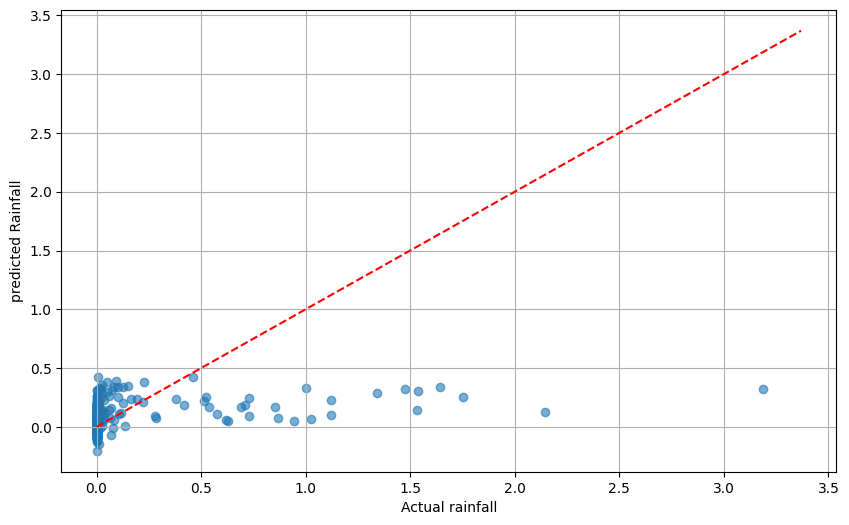

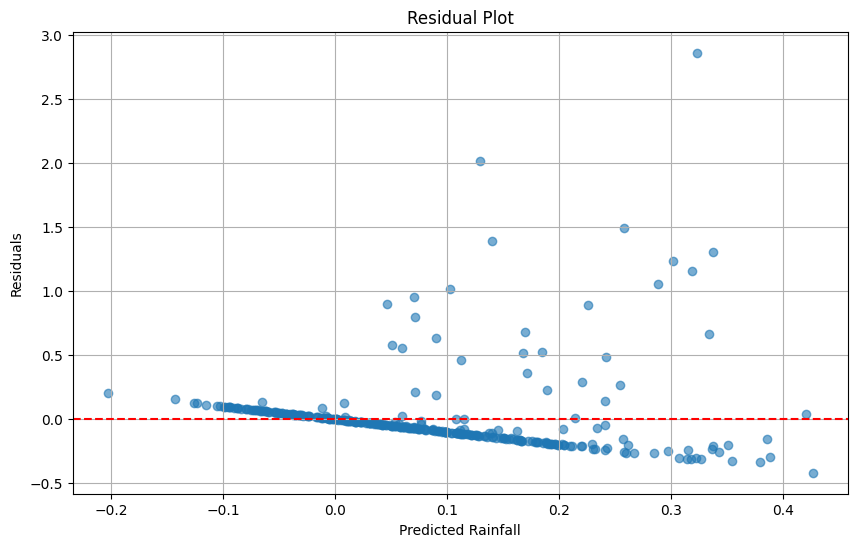

In [33]:
#plot the graph
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,alpha=0.6)
plt.plot([y.min(),y.max()],[y.min(),y.max()],color='red',linestyle='--')
plt.xlabel("Actual rainfall")
plt.ylabel("predicted Rainfall")
plt.grid()
plt.show()

residuals=y_test-y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Rainfall')
plt.ylabel('Residuals')
plt.grid()
plt.show()